Equation to simulate:

```math
    dS = S*(\frac{3}{1300} + 0.2dX)
```

where $dX \sim N(0,\frac{1}{\sqrt{52}}^2)$ and $S$ is the value of the underlying. Initial condition $S_0 = 100$.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Initial condition
S = [100]
# delta change
delta_x = np.random.normal(0,1/(52)**0.5, 51)

for i in range(len(delta_x)):
    S_prev = S[-1]
    S_change = S_prev * (3/1300 + 0.2*delta_x[i])
    S.append(S_prev + S_change)

print(S)

[100, 95.32064907969018, 97.32717531194005, 96.4684997327983, 102.03019570637677, 101.69237866827292, 99.6102548596782, 100.84081857553946, 102.51663714748653, 103.05864857216672, 100.96170735735424, 102.15850999765237, 99.9961358665161, 101.47341999017289, 100.43760404034883, 98.69968294878971, 98.59500666588262, 98.26371116384381, 96.68012920829887, 98.13093675335247, 106.34992531366055, 108.62294189477213, 108.34315343238171, 104.17067127687879, 108.9462894699085, 107.09015510696176, 108.5644896988972, 108.55429234134911, 109.48829457507328, 113.10910067871188, 117.32586138992966, 115.92344004865514, 117.68747147717836, 125.50474131104691, 129.51230461063554, 132.17751123401985, 134.4269550953607, 132.44217964100204, 134.66845633120604, 134.1258288158314, 133.77146934570445, 128.0030018346121, 123.522871905602, 125.31940228962276, 124.05432206183892, 124.51659413109765, 131.62184441755588, 134.71848546403533, 136.15786107783842, 137.2796566375981, 138.8811995802965, 146.859386803386

In [40]:
# Compile results into a dataframe
df_results = pd.DataFrame({'S': S})
df_results[['R_raw']] = df_results[['S']].diff() 
df_results[['R_pct']] = df_results[['S']].pct_change()

R_pct_mean = np.mean(df_results[['R_pct']])
R_pct_std = np.std(df_results[['R_pct']])

print(f'Percentage return mean is {R_pct_mean}, standard deviation is {R_pct_std}')

Percentage return mean is R_pct    0.007929
dtype: float64, standard deviation is R_pct    0.027232
dtype: float64


c:\Users\Bing En\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


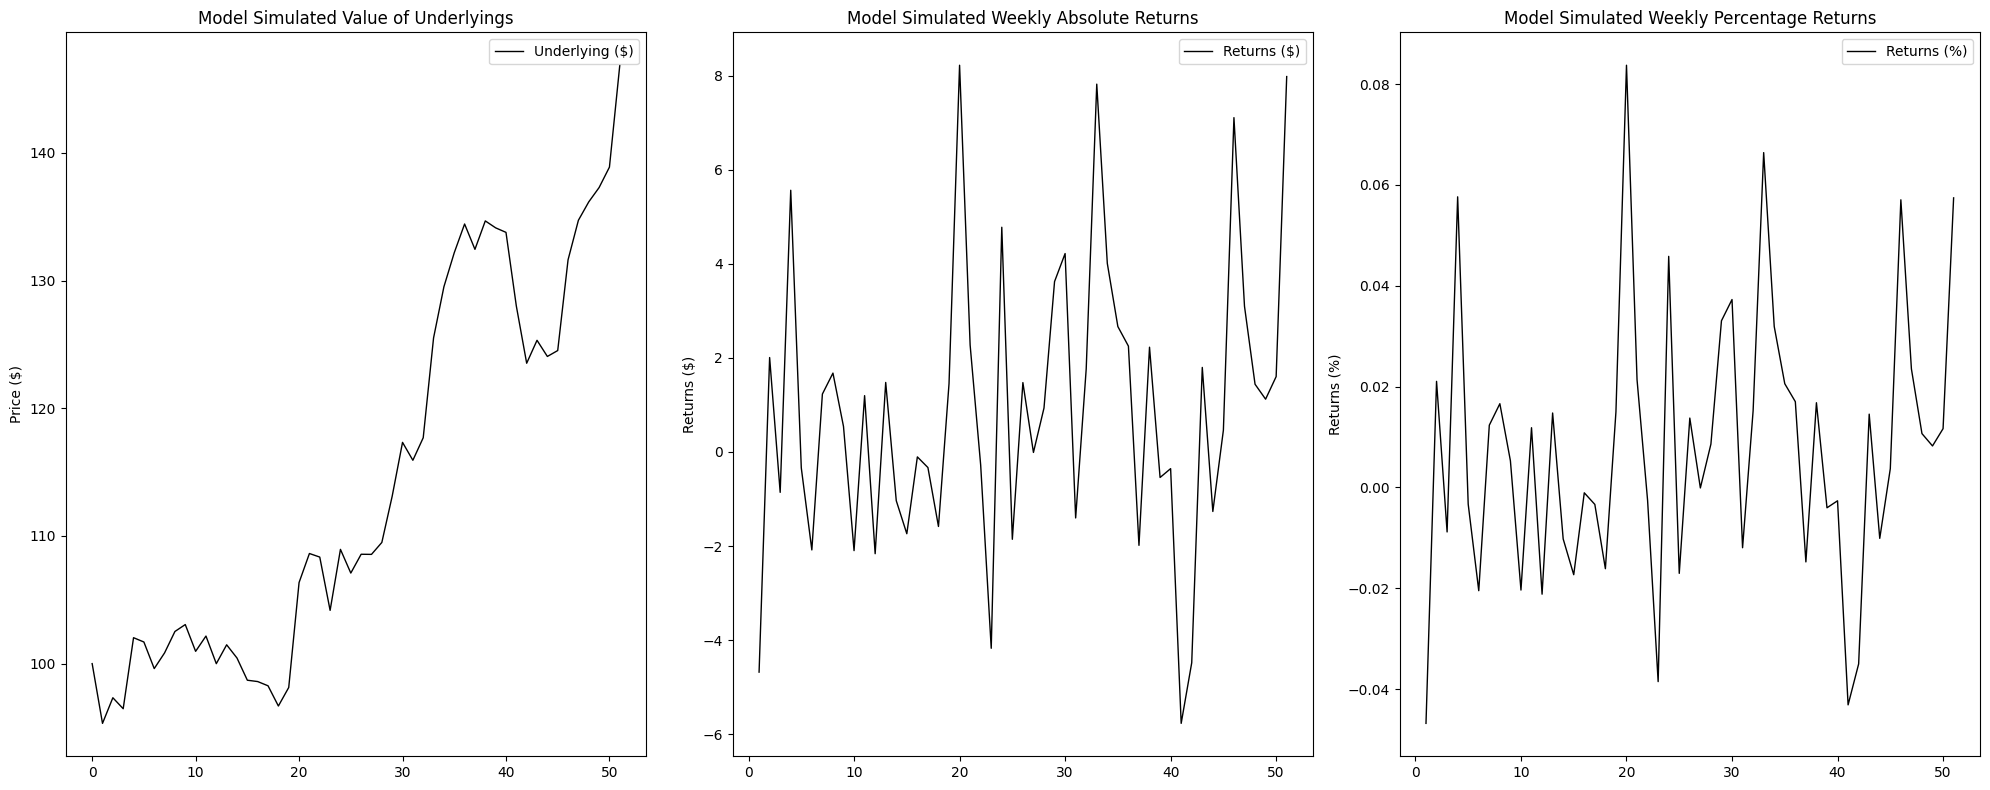

In [38]:
# Plot the Change in prices
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

# Plot timeseries change of the value of the underlying
ax1.plot(df_results.S, label = 'Underlying ($)', color='black', linewidth=1)
ax1.set_title('Model Simulated Value of Underlyings')
ax1.set_ylabel('Price ($)')
ax1.grid(False)
ax1.legend()

# Plot weekly returns
ax2.plot(df_results.R_raw, label = 'Returns ($)', color='black', linewidth=1)
ax2.set_title('Model Simulated Weekly Absolute Returns')
ax2.set_ylabel('Returns ($)')
ax2.grid(False)
ax2.legend()

# Plot weekly percentage returns
ax3.plot(df_results.R_pct, label = 'Returns (%)', color='black', linewidth=1)
ax3.set_title('Model Simulated Weekly Percentage Returns')
ax3.set_ylabel('Returns (%)')
ax3.grid(False)
ax3.legend()

plt.tight_layout()
plt.show()